In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# EDA

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/fintihlupik/NLP-sentimental/refs/heads/master/data/youtoxic_english_1000%20-%20youtoxic_english_1000.csv")

## Exploración inicial

In [ ]:
df.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


In [ ]:
print('La forma del dataset es', df.shape)
print('Rows duplicadas en el dataset :', df.duplicated().sum() )

La forma del dataset es (1000, 15)
Rows duplicadas en el dataset : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgjBJKQSoQMQ6ngCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [ ]:
%%capture
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from IPython.display import HTML # import the HTML object

In [ ]:
%%capture
profile_change = ProfileReport(df,title="Youtube Comments. Profiling Report", explorative=True,)
profile_change.to_file("output_change.html")
HTML(filename='output_change.html')

Hallazgos:

- No hay missing values.
- Las columnas IsHomophobic y IsRadicalism tienen valor constante de "False"
- El CommentId es un valor único.
- Los comentarios corresponden únicamente a 13 videos de youtube (13 VideoId)
- Las palabras más frecuentes son: and, the, a, to..
- El dataset está bastante balanceado en respecto a IsToxic
- El toxico está altamente relacionado con abusivo.
- IsSexist tiene solo un registro Positivo.
- Hay 997 comentarios diferentes, lo que sugiere que hay comentarios repetidos.

Esto nos servirá para la limpieza y preprocesamiento.



## Nulos, vacios y repetidos

In [ ]:
df.isnull().sum()

,0
CommentId,0
VideoId,0
Text,0
IsToxic,0
IsAbusive,0
IsThreat,0
IsProvocative,0
IsObscene,0
IsHatespeech,0
IsRacist,0


No hay nulos.

In [ ]:
df = df.drop(columns=['CommentId', 'IsHomophobic', 'IsRadicalism'])

Borramos las columnas que no aportan valor

In [ ]:
print("Vacíos:", df[df['Text'].str.strip() == ''].shape[0])

Vacíos: 0


No hay vacios

In [ ]:
num_duplicates = df['Text'].duplicated().sum()
print(f"Número de comentarios duplicados: {num_duplicates}")

Número de comentarios duplicados: 3


In [ ]:
duplicates = df[df['Text'].duplicated(keep=False)]
print(duplicates)

         VideoId           Text  IsToxic  IsAbusive  IsThreat  IsProvocative  \
592  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   
642  cT14IbTDW2c  run them over     True       True      True          False   
657  cT14IbTDW2c  run them over     True       True     False           True   
677  cT14IbTDW2c  run them over     True       True     False           True   
699  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   

     IsObscene  IsHatespeech  IsRacist  IsNationalist  IsSexist  \
592      False         False     False          False     False   
642      False         False     False          False     False   
657      False         False     False          False     False   
677      False         False     False          False     False   
699      False         False     False          False     False   

     IsReligiousHate  
592            False  
642            False  
657            False  
677            False  
6

In [ ]:
# Crear una columna temporal con texto en minúsculas para detectar duplicados
df['Text_lower'] = df['Text'].str.lower()

# Buscar duplicados según texto en minúsculas
duplicates_ignore_case = df[df['Text_lower'].duplicated(keep=False)]

print(duplicates_ignore_case)


         VideoId           Text  IsToxic  IsAbusive  IsThreat  IsProvocative  \
578  cT14IbTDW2c  Run them over     True       True     False           True   
592  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   
642  cT14IbTDW2c  run them over     True       True      True          False   
657  cT14IbTDW2c  run them over     True       True     False           True   
677  cT14IbTDW2c  run them over     True       True     False           True   
699  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   

     IsObscene  IsHatespeech  IsRacist  IsNationalist  IsSexist  \
578      False         False     False          False     False   
592      False         False     False          False     False   
642      False         False     False          False     False   
657      False         False     False          False     False   
677      False         False     False          False     False   
699      False         False     Fals

## Outliers y longitud de comentarios

In [ ]:
df['comment_length'] = df['Text'].apply(lambda x: len(str(x).split()))
print(df['comment_length'].describe())

count    1000.000000
mean       33.776000
std        49.069498
min         1.000000
25%         9.000000
50%        19.000000
75%        39.000000
max       815.000000
Name: comment_length, dtype: float64


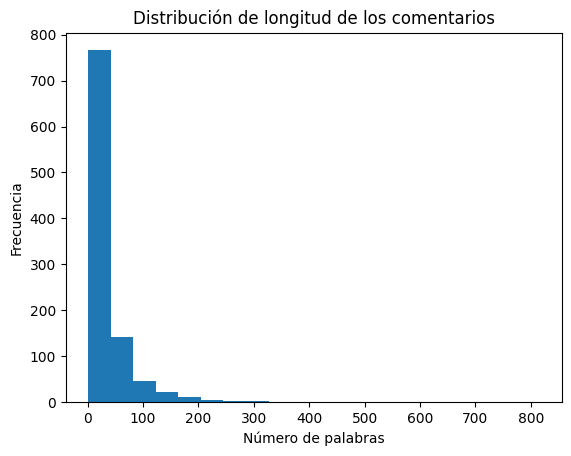

In [ ]:
plt.hist(df['comment_length'], bins=20)
plt.title("Distribución de longitud de los comentarios")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

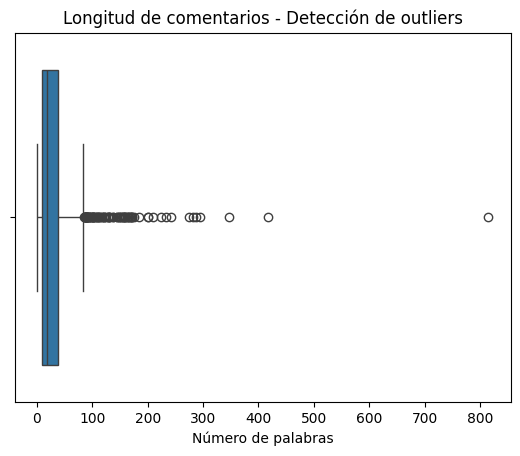

In [ ]:
sns.boxplot(x=df['comment_length'])
plt.title("Longitud de comentarios - Detección de outliers")
plt.xlabel("Número de palabras")
plt.show()

In [ ]:
Q1 = df['comment_length'].quantile(0.25)
Q3 = df['comment_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # (el lower bound da -36, no hay outliers cortos)
upper_bound = Q3 + 1.5 * IQR # (84 - todos mayores a 84 son outliers)

# Comentarios fuera del rango aceptable
outliers = df[(df['comment_length'] < lower_bound) | (df['comment_length'] > upper_bound)]
print(f"Outliers detectados: {len(outliers)} comentarios")

# Porcentaje de outliers
print(f"{100 * len(outliers) / len(df):.2f}% del dataset son outliers de longitud")

Outliers detectados: 86 comentarios
8.60% del dataset son outliers de longitud


## Longitud por clase

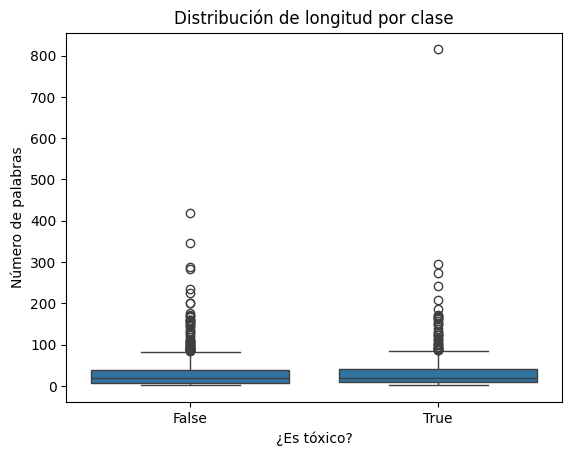

In [ ]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='IsToxic', y='word_count', data=df)
plt.title("Distribución de longitud por clase")
plt.xlabel("¿Es tóxico?")
plt.ylabel("Número de palabras")
plt.show()

Vemos comentarios cortos

In [ ]:
short_comments = df[df['comment_length'] < 3][['Text', 'comment_length', 'IsToxic']].sort_values(by='comment_length')
print(short_comments)

                                         Text  comment_length  IsToxic
105                                    Wow!!!               1    False
433                                       wtf               1    False
908  Darude...............sand...storm.......               1    False
717                            Wow...........               1    False
745                                  Respect!               1    False
691                                    Idiotz               1     True
845                                     GOOD                1    False
965                                  ignorant               1    False
788                                    Bravo!               1    False
837                     #blacklivesdontmatter               1     True
627                                    Idiots               1     True
595                           #alllivesmatter               1    False
243                            Perfect police               2    False
244   

Los comentarios cortos son válidos.

Vemos comentarios largos

In [ ]:
long_comments = df[df['comment_length'] > 150][['Text', 'comment_length', 'IsToxic']].sort_values(by='IsToxic')
print(long_comments)

                                                  Text  comment_length  \
0    If only people would just take a step back and...             287   
927  Look people, black lives do matter just like w...             167   
815  Thank you. Finally, a powerful voice for the t...             347   
565  It’s not that easy to be a cop. “I have a lot ...             224   
553  Here in Finland with a population of over 5 mi...             282   
542  It is always easier to second guess someone. C...             159   
510  I don't think somebody deserves to die because...             160   
492  This guy is a little biased that's for sure , ...             176   
447  There's so much good data here.\n\nI wish it w...             157   
987  I am not black...many years ago I was almost s...             201   
316  Couple things you missed on both sides of the ...             160   
310  The major difference between the Zimmerman cas...             201   
991  What point are you trying to make

Los outliers son comentarios válidos.

/tmp/ipython-input-22-3102025155.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  toxicity_by_length = df.groupby('length_range')['IsToxic'].mean() * 100
/tmp/ipython-input-22-3102025155.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toxicity_by_length.index, y=toxicity_by_length.values, palette='viridis')


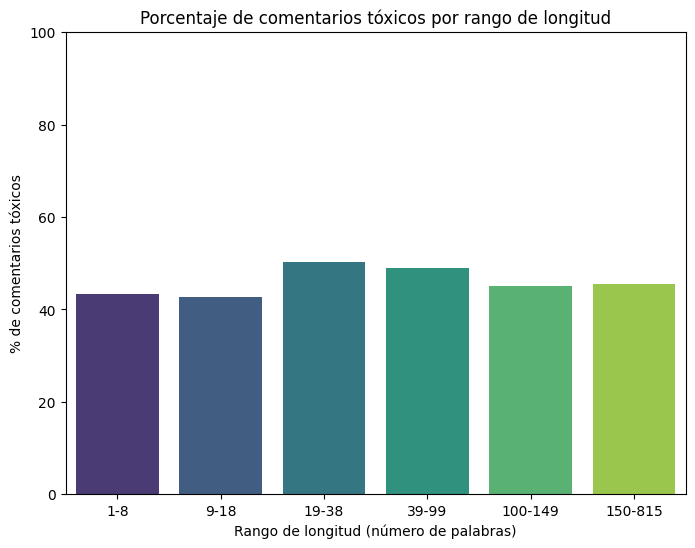

In [ ]:
# Definir los bins para los rangos de longitud
bins = [0, 9, 19, 39, 100, 150, 816]
labels = ['1-8', '9-18', '19-38', '39-99', '100-149', '150-815']

# Crear una nueva columna con el rango de longitud
df['length_range'] = pd.cut(df['comment_length'], bins=bins, labels=labels, right=False)

# Agrupar por rango y calcular porcentaje de tóxicos
toxicity_by_length = df.groupby('length_range')['IsToxic'].mean() * 100

# Crear gráfica de barras
plt.figure(figsize=(8,6))
sns.barplot(x=toxicity_by_length.index, y=toxicity_by_length.values, palette='viridis')

plt.title('Porcentaje de comentarios tóxicos por rango de longitud')
plt.xlabel('Rango de longitud (número de palabras)')
plt.ylabel('% de comentarios tóxicos')
plt.ylim(0, 100)
plt.show()


Como se puede ver la longitud del mensaje no parece ser un fuerte predictor de toxicidad del mensaje.

## Analisis de tipos de toxicidad

/tmp/ipython-input-23-964801668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_totals.values, y=tag_totals.index, palette='viridis')


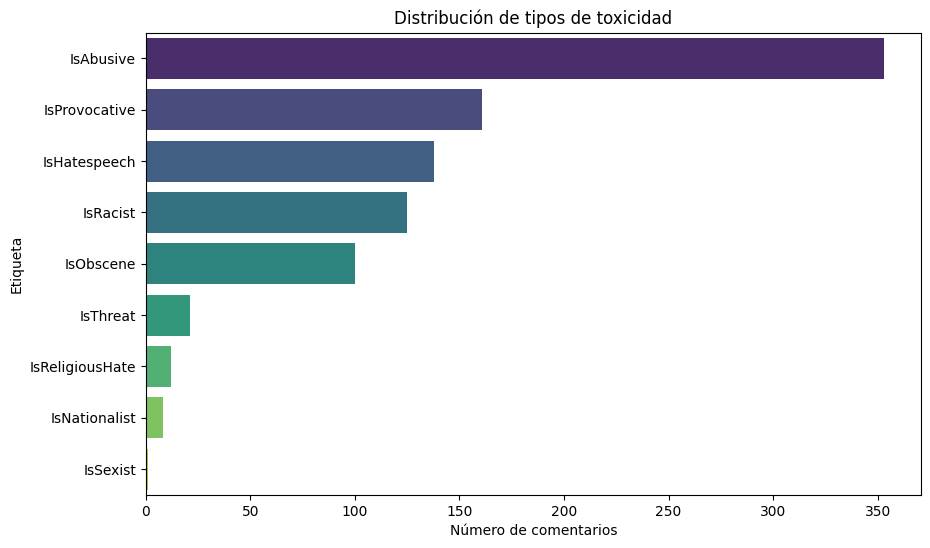

In [ ]:
# Convertimos las columnas booleanas a bool (por si hay categorías)
multi_tags = df.loc[:, 'IsAbusive':'IsReligiousHate'].astype(bool)

tag_totals = multi_tags.sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=tag_totals.values, y=tag_totals.index, palette='viridis')
plt.title("Distribución de tipos de toxicidad")
plt.xlabel("Número de comentarios")
plt.ylabel("Etiqueta")
plt.show()


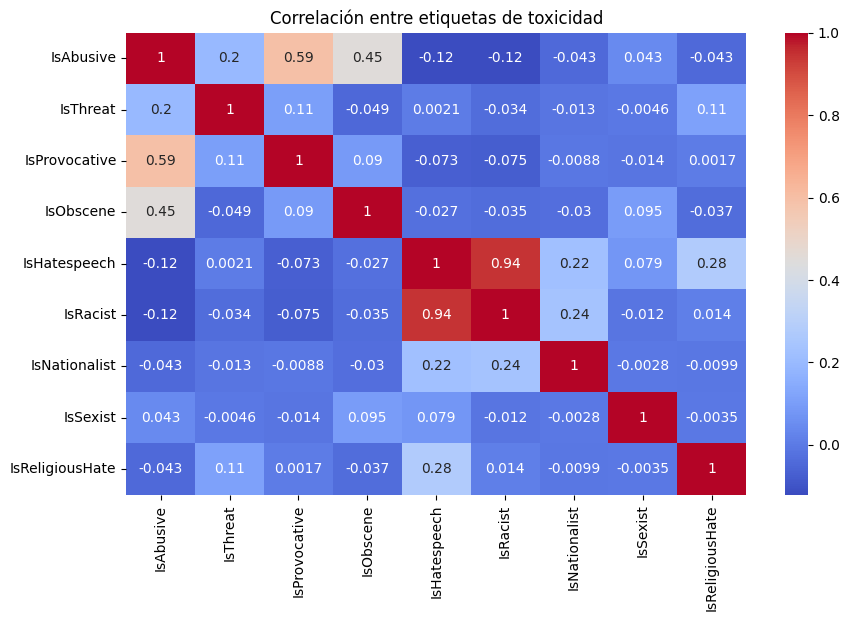

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(multi_tags.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre etiquetas de toxicidad")
plt.show()


- Hay una correlación muy alta entre el Hatespeech y Racist.
- Existe una correlación moderarada entre el Abusive y Provocative.
- Hay una correlación moderarada entre el Obscene y Abusive.


La correlación entre el Hatespeech y Racist de 0,94 sugiere una multicolinealidad y redundancia, si estuvieramos trabajando con estas variables habría que tomar medidas al respecto (eliminar una de las variables, combinarlas o usar técnicas robustas a colinealidad).

## Distribución de clases (balanceo)

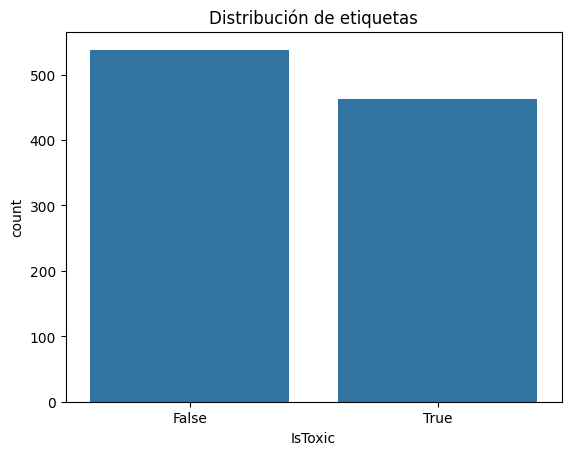

IsToxic
False    0.538
True     0.462
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='IsToxic')
plt.title("Distribución de etiquetas")
plt.show()

print(df['IsToxic'].value_counts(normalize=True))


In [ ]:
percentages = df['IsToxic'].value_counts(normalize=True) * 100
percentages = percentages.round(2)
print(percentages)

IsToxic
False    53.8
True     46.2
Name: proportion, dtype: float64


Como vimos anteriormente el dataset está bien balanceado.

## Analisis inicial de palabras

### Frecuencia

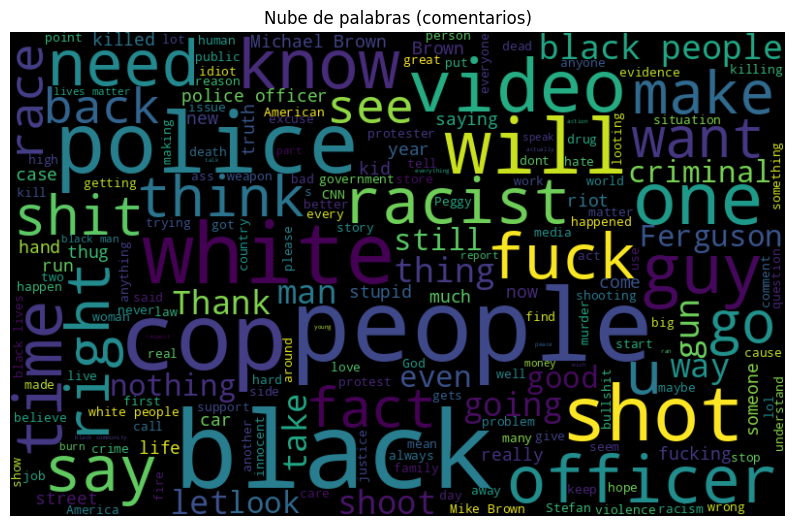

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Nube de palabras (comentarios)")
plt.show()



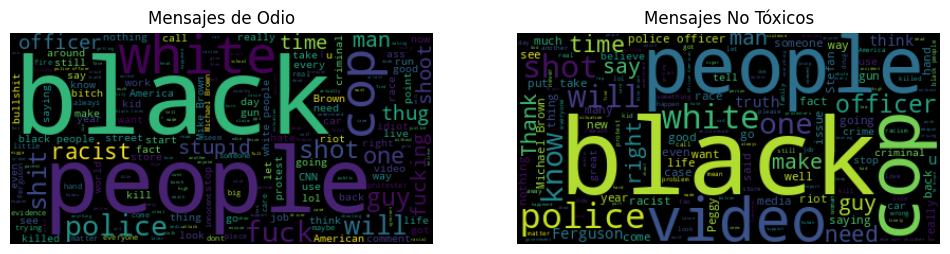

In [ ]:
toxic_text = df[df['IsToxic'] == True]['Text'].str.cat(sep=' ')
non_toxic_text = df[df['IsToxic'] == False]['Text'].str.cat(sep=' ')

wordcloud_toxic = WordCloud(max_font_size=100).generate(toxic_text)
wordcloud_non_toxic = WordCloud(max_font_size=100).generate(non_toxic_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.title("Mensajes de Odio")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.title("Mensajes No Tóxicos")
plt.axis('off')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'])

# Separar por clase
toxic_words = vectorizer.fit_transform(df[df['IsToxic']]['Text'])
non_toxic_words = vectorizer.fit_transform(df[~df['IsToxic']]['Text'])

# Palabras más frecuentes en cada grupo
toxic_counts = toxic_words.sum(axis=0).A1
non_toxic_counts = non_toxic_words.sum(axis=0).A1
tokens = vectorizer.get_feature_names_out()

# Diferencia entre ambos
freq_diff = pd.DataFrame({'token': tokens,
                          'toxic': toxic_counts,
                          'non_toxic': non_toxic_counts})
freq_diff['diff'] = freq_diff['toxic'] - freq_diff['non_toxic']
freq_diff = freq_diff.sort_values('diff', ascending=False)

print(freq_diff.head(10))  # Palabras más asociadas a toxicidad


         token  toxic  non_toxic  diff
634      place    128          3   125
76        away    133         17   116
970  witnesses     78          5    73
499     looted     75          3    72
657   powerful     73          3    70
457        law     75         14    61
100      bless     55          5    50
800     sltrib     50          2    48
335      folks     51          3    48
607        omg     39          3    36


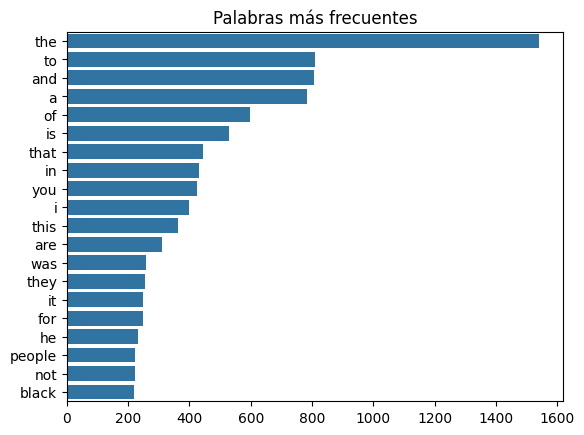

In [ ]:
from collections import Counter

all_words = ' '.join(df['Text']).lower().split()
common_words = Counter(all_words).most_common(20)

# Visualizar
words, counts = zip(*common_words)
sns.barplot(x=counts, y=words)
plt.title("Palabras más frecuentes")
plt.show()


La alta frecuencia de las palabras que aportan poco valor y significado sugiere una necesidad de limpieza y preprocesamiento.

In [ ]:
import re

def has_repeated_chars(word):
    return re.search(r'(.)\1{2,}', word) is not None  # detecta repetidas 3 o más veces

df['repeated'] = df['Text'].apply(lambda x: any(has_repeated_chars(w) for w in x.split()))
print("Porcentaje de comentarios con letras repetidas:", df['repeated'].mean() * 100)


Porcentaje de comentarios con letras repetidas: 20.7


Buscamos comentarios como "aaaaaaaay dios" o "odiiiiio", vemos que no tienen un porcentaje alto - solo 3,1 % y aportan carga emocional.

### Palabras muy largas y palabras raras

<Axes: >

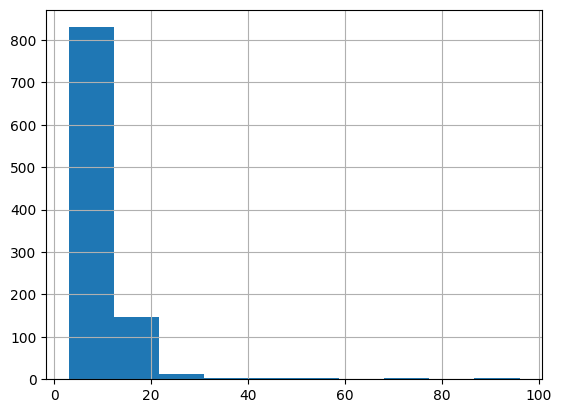

In [ ]:
df['Text'].apply(lambda x: max([len(w) for w in x.split()])).hist()

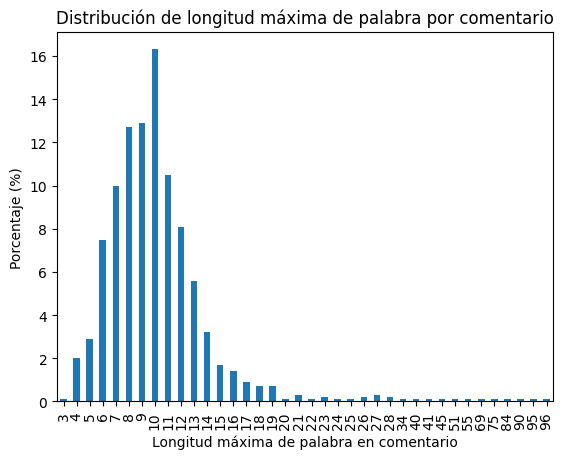

In [ ]:
import matplotlib.pyplot as plt

# Calcular máximo largo por comentario
max_len_words = df['Text'].apply(lambda x: max([len(w) for w in x.split()]))

# Contar frecuencia de cada longitud
counts = max_len_words.value_counts().sort_index()

# Pasar a porcentaje
percentages = counts / counts.sum() * 100

# Graficar
percentages.plot(kind='bar')
plt.xlabel('Longitud máxima de palabra en comentario')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de longitud máxima de palabra por comentario')
plt.show()


In [ ]:
from collections import Counter
import nltk
nltk.download('words')
from nltk.corpus import words

# Crear set de palabras válidas en inglés (puedes usar un diccionario en español también)
english_vocab = set(w.lower() for w in words.words())

# Extraer todas las palabras del dataset
all_words = " ".join(df['Text']).split()
counter = Counter(all_words)

# Palabras que no están en el vocabulario
rare_words_all = [word for word in counter if word.lower() not in english_vocab and counter[word] < 3]

print("Ejemplos de rare words:", rare_words_all[:50])
print("Porcentaje de rare words:", len(rare_words_all) / len(counter) * 100)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Ejemplos de rare words: ['them,', 'kinds', 'investigation.', 'hyped', 'heard,', 'presses', 'more.', 'discussion.', 'fool.', 'hate.', 'way,', 'epidemic?', 'pretending', 'witnessed', 'swung.', 'informed,', '99.999%', 'protect,', 'over,', 'actions.', 'emergency.', 'apprehend.', 'kill.', 'bitch.', "'black", "matter'", 'banners', 'cunts', 'kinda', 'somethin', 'better..', 'selves', 'pride.', "'ooo", "people'", 'pussyfootin', 'fuckin', 'officers.', 'danger,', 'hessitate', 'help,', 'Police.', 'complaining', 'requires', 'line,', 'right,', 'hes', 'times?', 'facebook', 'https://www.facebook.com/bassem.masri.520']
Porcentaje de rare words: 50.431206050152575


In [ ]:
from collections import Counter

texts = df['Text'].astype(str).str.lower()

# Set de palabras válidas en inglés
english_vocab = set(words.words())

# -----------------------------------------
# 1. Extraer todos los tokens
tokens = [word for text in texts for word in re.findall(r"\b\w+\b", text)]

# 2. Contar frecuencia
token_freq = Counter(tokens)

# 3. Identificar palabras "raras" (no en vocabulario)
rare_words = [word for word in token_freq if word not in english_vocab and not word.isdigit()]

# 4. Filtrar por frecuencia (slang comunes o errores frecuentes)
rares = {word: freq for word, freq in token_freq.items() if word in rare_words and freq > 0}
rare_common = {word: freq for word, freq in token_freq.items() if word in rare_words and freq > 5}

# 5. Palabras con números (como od1o, h8, gr8)
words_with_numbers = [w for w in rares if re.search(r'[a-z]*\d+[a-z]*', w)]

# 6. Palabras con repeticiones de letras (como hellooo, goooood)
words_with_repeats = [w for w in rares if re.search(r'(.)\1{2,}', w)]

# 7. Combinar y mostrar todo lo raro
print("\n🔍 Rare Common Words (slang candidates or spelling mistakes):")
print(dict(sorted(rares.items(), key=lambda x: -x[1])[:50]))  # top 50

print("\n🔢 Words with Numbers:")
print(words_with_numbers)

print("\n📣 Words with Repeated Letters repeated more than 5 times:")
print(words_with_repeats)



🔍 Rare Common Words (slang candidates or spelling mistakes):
{'has': 69, 'cops': 69, 'blacks': 59, 'fuck': 55, 'shit': 50, 'ferguson': 43, 'michael': 42, 'fucking': 36, 'killed': 35, 'lives': 33, 'stefan': 33, 'hands': 31, 'lol': 31, 'didn': 31, 'america': 30, 'cnn': 29, 'facts': 29, 'wilson': 27, 'american': 25, 'protesters': 23, 'officers': 22, 'mr': 22, 'kid': 20, 'happened': 20, 'years': 20, 'kids': 20, 'gets': 18, 'doesn': 18, 'riots': 18, 'looting': 18, 'bullshit': 17, 'seems': 17, 'isn': 16, 'things': 16, 'molyneux': 16, 'makes': 15, 'masri': 15, 'guys': 15, 'shots': 15, 'comments': 15, 'hubbard': 15, 'african': 14, 'assaulted': 14, 'says': 14, 'criminals': 13, 'children': 13, 'americans': 13, 've': 13, 'started': 12, 'll': 12}

🔢 Words with Numbers:
['1520s', '1600s', '3300fps', '15mins', 'ak47', '13th', '150ft', '2nd', 'lies100', '6yfbbt6dvhg', '6times', 'seattlemqrksjoin3', '59pm', '3rd', '10th', '5th', 'vicdan0002', '80s', 'k9s', '6ft', '7am', '464_1408123040']

📣 Words wit

# Preprocesamiento

## Normalización y limpieza básica

In [ ]:
%%capture
!pip install contractions unidecode emoji

In [ ]:
# import unicodedata

# def remove_accents(text):
#     text = unicodedata.normalize('NFKD', text)
#     text = ''.join([c for c in text if not unicodedata.combining(c)])
#     return text

In [ ]:
import re
import contractions
from unidecode import unidecode

def normalize_text(text):

    text = text.lower()
    text = unidecode(text)  # elimina acentos
    text = re.sub(r"\'scuse", " excuse ", text)
    text = contractions.fix(text) # p.ej can´t -> cannot

    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text) # reemplaza múltiples espacios por uno solo (incluye \t, \n etc)
    text = text.strip()  # elimina espacios al inicio y final

    return text


In [ ]:
import emoji

def clean_noise(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # elimina URLs
    text = re.sub(r'@\w+', '', text) # elimina menciones del usuario @pepe
    text = emoji.demojize(text) # reemplaza emojis por su nombre

    return text

In [ ]:
def clean_normalize(text):
  text = clean_noise(text)
  text = normalize_text(text)
  return text

Vemos ejemplos del dataset sin procesar

In [ ]:
print(df.iloc[133]['Text'])

I made a song addressing Ferguson and the issues today. Please listen and thank you

Tha Bigger Picture - SoundCloud
Listen to Tha Bigger Picture by Kool D #np on #SoundCloud
http://soundcloud.com/derek-savage-3/tha-bigger-picture


In [ ]:
print(df.iloc[111]['Text'])

Well done 👍


Aplicamos la limpieza

In [ ]:
df['Text'] = df['Text'].apply(clean_normalize)

In [ ]:
print(df.iloc[133]['Text'])

i made a song addressing ferguson and the issues today please listen and thank you tha bigger picture soundcloud listen to tha bigger picture by kool d np on soundcloud


In [ ]:
print(df.iloc[111]['Text'])

well done thumbs_up


In [ ]:
df.columns

Index(['VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
       'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsReligiousHate', 'Text_lower', 'comment_length', 'word_count',
       'length_range', 'repeated'],
      dtype='object')

In [ ]:
df_basic = df.copy()

In [ ]:
df_basic = df.drop(columns=['comment_length', 'word_count', 'length_range', 'Text_lower' ])

In [ ]:
df_basic.columns

Index(['VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
       'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsReligiousHate', 'repeated'],
      dtype='object')

In [ ]:
df_basic.to_csv('df_basic.csv', index=False)

## Limpieza de slang, abreviaciones y corrección ortográfica

In [ ]:
print("Palabras raras:", rare_words_all)
print (len(rare_words_all))

Palabras raras: ['them,', 'kinds', 'investigation.', 'hyped', 'heard,', 'presses', 'more.', 'discussion.', 'fool.', 'hate.', 'way,', 'epidemic?', 'pretending', 'witnessed', 'swung.', 'informed,', '99.999%', 'protect,', 'over,', 'actions.', 'emergency.', 'apprehend.', 'kill.', 'bitch.', "'black", "matter'", 'banners', 'cunts', 'kinda', 'somethin', 'better..', 'selves', 'pride.', "'ooo", "people'", 'pussyfootin', 'fuckin', 'officers.', 'danger,', 'hessitate', 'help,', 'Police.', 'complaining', 'requires', 'line,', 'right,', 'hes', 'times?', 'facebook', 'https://www.facebook.com/bassem.masri.520', 'groups', 'muslim', 'post.', '"Black', 'rioters."', 'delivered', 'childish,', 'cartoon-ish', 'emotions....', "American's", 'Staten', 'Garnier', 'choked', 'mafia', 'controlled', 'Island.', 'cars.', 'Nothing.', 'protestor.', 'boooshit', 'point.', 'abilities', 'messege!', 'dick.', 'focusing', 'gunna', 'chimpers', 'pumping', 'hearts.', 'believe,', 'say."', 'Masri,', "would'nt", 'Thug.', 'decision.',

In [ ]:
slang_dict = {
    # Abbreviations & contractions
    "q": "what",
    "nt": "not",
    "w8": "wait",
    "bc": "because",
    "idk": "i do not know",
    "imo": "in my opinion",
    "brb": "be right back",
    "btw": "by the way",
    "omg": "oh my god",
    "lol": "laughing out loud",
    "wtf": "what the fuck",
    "lmfao": "laughing my fucking ass off",
    "rofl": "rolling on the floor laughing",
    'k9s': 'canines',
    "smh": "shaking my head",
    "yolo": "you only live once",
    "gunna": "going to",
    "gonna": "going to",
    "hes": "he is",
    "shes": "she is",
    "aint": "is not",
    "lemme": "let me",
    "gimme": "give me",
    "wanna": "want to",
    "gotta": "got to",
    "tryna": "trying to",
    "kinda": "kind of",
    "sorta": "sort of",
    "tho": "though",
    "coz": "because",
    "cuz": "because",
    "ya": "you",
    "nah": "no",
    "yeah": "yes",
    "hbu": "how about you",
    "idc": "i do not care",
    "ikr": "i know right",
    "mr": "mister",
    'ayy': 'hey',
    'duhhh': 'duh',
    'pls': 'please',
    'ummm': 'um',
    "ish": "sort of",
    'outta': 'out of',
    'thru': 'through',
    'stfu': 'shut the fuck up',
    'lmao': 'laughing my ass off',
    'lolol': 'laugh out loud',
    'tbh': 'to be honest',
    'smh': 'shaking my head',
    'yolo': 'you only live once',
    'btw': 'by the way',
    'iz': 'is',
    'hmmm': 'hmm',
    'mins': 'minutes',
    'dindu': 'did not do',
    'k9': 'canine',
    'np': 'no problem',


    # Slang/shortened words
    "somethin": "something",
    "nothin": "nothing",
    "goin": "going",
    "comin": "coming",
    "watchin": "watching",
    "talkin": "talking",
    "lookin": "looking",
    "doin": "doing",
    "thinkin": "thinking",
    "boooshit": "bullshit",
    "gunna": "going to",
    'tellin': 'telling',
    'tryin': 'trying',
    'reffering': 'referring',
    'interviwing': 'interviewing',
    'fucken': 'fucking',
    'gettin': 'getting',
    'showin': 'showing',
    'cussin': 'cussing',
    'protestin': 'protesting',
    'mutherfuckin': 'motherfucking',
    'mutherfucker': 'motherfucker',
    'mothafuckin': 'motherfucking',
    'mothafuckas': 'motherfuckers',
    'freakin': 'freaking',
    'awakes': 'wakes up',
    'tru': 'true',
    'fuxking': 'fucking',


    # Visual/emotional expressions
    ":)": "smile",
    ":(": "sad",
    ":D": "big_smile",
    "<3": "love",
    ":-)": "smile",
    ":'(": "crying",
    "ooo": "oh",
    "booo": "oh",
    'woweee': 'wow',

    # Other
    "pussyfootin": "hesitating",
    'assss': 'ass',
    'dumbest': 'dumb',
    'clueless': 'not aware',
}


In [ ]:
correction_dict = {
    "messege": "message",
    "hessitate": "hesitate",
    "recieve": "receive",
    "definately": "definitely",
    "seperated": "separated",
    "occured": "occurred",
    "untill": "until",
    "thier": "their",
    "goverment": "government",
    "wierd": "weird",
}


In [ ]:
%%capture
!pip install pyspellchecker

In [ ]:
import re
from spellchecker import SpellChecker

spell = SpellChecker(language='en')

def replace_slang(text, slang_dict):
    # Reemplaza palabras en texto según slang_dict (solo palabras completas)
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, slang_dict.keys())) + r')\b')
    return pattern.sub(lambda x: slang_dict[x.group().lower()], text)

def correct_spelling(word, correction_dict, spell):
    # Si palabra está en correcciones manuales, aplica esa
    if word.lower() in correction_dict:
        return correction_dict[word.lower()]

    # No corregir si no es alfabético (para no romper slang con números)
    if not word.isalpha():
        return word

    # Usar spellchecker para corregir si hay cambio
    corrected = spell.correction(word)
    return corrected if corrected else word

def normalize_repeated_letters(word):
    # Reduce letras repetidas >2 a solo 2 (ej: ooooola -> oola)
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

def preprocess_text(text, slang_dict, correction_dict, spell):
    text = text.lower()
    text = replace_slang(text, slang_dict)
    return text


In [ ]:
df['text_processed'] = df['Text'].apply(lambda x: preprocess_text(x, slang_dict, correction_dict, spell))

In [ ]:
print(df.iloc[318]['Text'])


crazy how everyone likes the video before actually watching it this video has been out 38 mins and the video is 39 mins long lol


In [ ]:
print(df.iloc[318]['text_processed'])

crazy how everyone likes the video before actually watching it this video has been out 38 minutes and the video is 39 minutes long laughing out loud


## Tokenización

In [ ]:
%%capture
!pip install nltk
!pip install spacy

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
%%capture
# Cargar modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# Descargar stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.discard('not')  # quitamos 'not' de stopwords
stop_words.discard("no")   # opcional

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 1]

In [ ]:
def token_stopwords(text):
  tokens = tokenize_text(text)
  tokens = [normalize_repeated_letters(t) for t in tokens]
  tokens = [correct_spelling(t, correction_dict, spell) for t in tokens]
  tokens = remove_stopwords(tokens)
  return tokens

In [ ]:
df['text_processed'] = df['text_processed'].apply(token_stopwords)

In [ ]:
df.iloc[133]['Text']

'i made a song addressing ferguson and the issues today please listen and thank you tha bigger picture soundcloud listen to tha bigger picture by kool d np on soundcloud'

In [ ]:
df.iloc[133]['text_processed']

['made',
 'song',
 'addressing',
 'ferguson',
 'issues',
 'today',
 'please',
 'listen',
 'thank',
 'bigger',
 'picture',
 'soundcloud',
 'listen',
 'bigger',
 'picture',
 'cool',
 'no',
 'problem',
 'soundcloud']

In [ ]:
# sample_text = "    I'scuse 😂 I'm sure you can't    do what's needed, but I'll :)  : try #acción y_ñ 345 y aren't, . ;he's i'd. 😡 "
# todot = clean_stopwords(sample_text)
# todot

## Lematización

In [ ]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

In [ ]:
df['text_processed'] = df['text_processed'].apply(lemmatize_tokens)

In [ ]:
df.iloc[318]['Text']

'crazy how everyone likes the video before actually watching it this video has been out 38 mins and the video is 39 mins long lol'

In [ ]:
print(df.iloc[318]['text_processed'])

['crazy', 'everyone', 'like', 'video', 'actually', 'watch', 'video', '38', 'minute', 'video', '39', 'minute', 'long', 'laugh', 'loud']


In [ ]:
df.columns

Index(['VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
       'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsReligiousHate', 'Text_lower', 'comment_length', 'word_count',
       'length_range', 'repeated', 'text_processed'],
      dtype='object')

In [ ]:
df_lematized=df.copy()

In [ ]:
df_lematized = df.drop(columns=['comment_length', 'word_count', 'length_range', 'Text_lower', 'repeated'])

In [ ]:
df_lematized.columns

Index(['VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
       'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsReligiousHate', 'text_processed'],
      dtype='object')

In [ ]:
df_lematized.to_csv('df_lematized.csv', index=False)

## Visualización

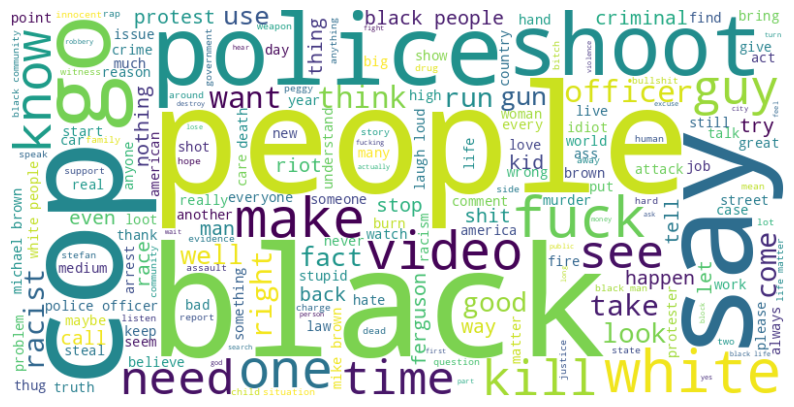

In [ ]:
all_w = ' '.join([' '.join(tokens) for tokens in df['text_processed']])

# 2. Crear la wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_w)

# 3. Mostrar la wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

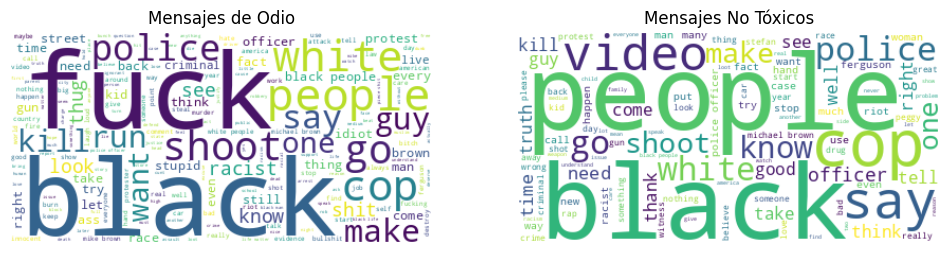

In [ ]:
# Unir tokens por fila y luego concatenar para tóxicos
toxic_text = ' '.join([' '.join(tokens) for tokens in df[df['IsToxic'] == True]['text_processed']])

# Unir tokens por fila y luego concatenar para no tóxicos
non_toxic_text = ' '.join([' '.join(tokens) for tokens in df[df['IsToxic'] == False]['text_processed']])

# Crear wordclouds
wordcloud_toxic = WordCloud(max_font_size=100, background_color='white').generate(toxic_text)
wordcloud_non_toxic = WordCloud(max_font_size=100, background_color='white').generate(non_toxic_text)

# Mostrar en subplots
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.title("Mensajes de Odio")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.title("Mensajes No Tóxicos")
plt.axis('off')

plt.show()

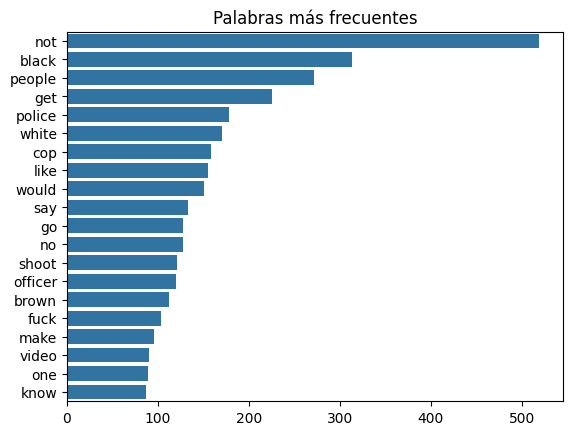

In [ ]:
# Unir todos los tokens en una sola lista
all_words = [token for tokens_list in df['text_processed'] for token in tokens_list]

# Contar las 20 palabras más comunes
common_words = Counter(all_words).most_common(20)

# Separar palabras y conteos para la gráfica
words, counts = zip(*common_words)

# Visualizar con seaborn
sns.barplot(x=counts, y=words)
plt.title("Palabras más frecuentes")
plt.show()


In [ ]:
# Primero, une los tokens de cada fila en un string separado por espacios
df['text_joined'] = df['text_processed'].apply(lambda tokens: ' '.join(tokens))

# Instancia CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Ajusta y transforma todo el texto (opcional, si solo quieres vocabulario global)
X = vectorizer.fit_transform(df['text_joined'])

# Transforma texto de tóxicos y no tóxicos usando el mismo vectorizer
toxic_texts = df[df['IsToxic']]['text_joined']
non_toxic_texts = df[~df['IsToxic']]['text_joined']

toxic_words = vectorizer.transform(toxic_texts)
non_toxic_words = vectorizer.transform(non_toxic_texts)

# Suma frecuencias de cada palabra en ambos grupos
toxic_counts = toxic_words.sum(axis=0).A1
non_toxic_counts = non_toxic_words.sum(axis=0).A1

tokens = vectorizer.get_feature_names_out()

# Crea DataFrame con las diferencias
freq_diff = pd.DataFrame({
    'token': tokens,
    'toxic': toxic_counts,
    'non_toxic': non_toxic_counts
})

freq_diff['diff'] = freq_diff['toxic'] - freq_diff['non_toxic']
freq_diff = freq_diff.sort_values('diff', ascending=False)

print(freq_diff.head(10))


        token  toxic  non_toxic  diff
355      fuck     95          8    87
810      shit     45          5    40
785       run     42         12    30
908      thug     34          5    29
76        ass     36          8    28
976     white     98         72    26
873    stupid     33          7    26
439     idiot     26          1    25
275      dumb     19          1    18
135  bullshit     19          1    18


## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text_joined']
y = df['IsToxic'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)


## Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=None)

# Ajustar el vectorizador solo con el texto de entrenamiento
X_train = vectorizer.fit_transform(X_train)

# Transformar el texto de test con el vectorizador ya ajustado
X_test = vectorizer.transform(X_test)

print(f"Tamaño matriz de features: {X.shape}")

Tamaño matriz de features: (1000,)


In [ ]:
print(f"Tamaño matriz de features: {y.shape}")

Tamaño matriz de features: (1000,)


In [ ]:
print(vectorizer.get_feature_names_out()[:20])  # muestra las primeras 20

['00' '03' '05' '08' '09' '10' '100' '11' '110' '12' '13' '13th' '14' '15'
 '150' '151' '15min' '16' '17' '18']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# 1. Cargar CSV con texto YA preprocesado
df = pd.read_csv('train_data.csv')
texts = df['text']  # Ajusta si la columna se llama diferente

# 2. Fit del vectorizer directamente sobre esos textos
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts)

# 3. Guardar vectorizador ya entrenado
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# 4. Guardar la matriz vectorizada si lo necesitas
joblib.dump(X_train, 'X_train_tfidf.pkl')

print("✅ Vectorizador entrenado y guardado correctamente.")


['tfidf_vectorizer.pkl']

# Modelado

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
